I want to reduce dimensions from my dataset to improve clustering. Here I try dimension reduction with PCA.
Also see the following link to make a scree plot with PCA.
This link is useful: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

"Finally, explicitly cast the DataFrame into a numpy array which can be used  by the scikit-learn API. Note that at this point you lose your feature labels (Headers), so it would be difficult to keep track of the features if you use the "feature-importance" routine in scikit-learn. I have the practice of saving the headers before casting the data-frame into a numpy array. [>>list(<DataFrame>) prints out the headers into a nice list]"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn.preprocessing import robust_scale

Read in a well of unnormalized data as a numpy array

In [3]:
# Read data directly in as a numpy array. Not in use, it can't handle headers or columns of different type
#my_data = np.genfromtxt(
#    '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_i12.csv',
#    delimiter=','); # This might not work because of the metadata, 
## maybe import as pandas df then subset to a numpy array, then label with the metadata

In [4]:
#type(my_data)

numpy.ndarray

In [7]:
# Make sure that they data is read in properly!!!!!!!!, check types and classes of columns, etc
#my_data[[0,1,-2,-1]]

array([[             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan],
       [  0.00000000e+00,   5.20148000e+05,   7.66000000e+03,
          5.49105000e+05,   7.81400000e+03,   1.94881900e+06,
          1.44850000e+04,  -5.47752000e+05,   3.43100000e+03,
         -5.16340000e+04,

Read data in as a Pandas dataframe

In [2]:
filename = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv'

In [3]:
my_data=pd.read_csv(filename, index_col=0)

In [4]:
my_data.head()

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,VL5-A,VL5-H,VL6-A,VL6-H,Width,cell_label,cell_plate,lineage,screen,well
0,471067.0,5232.0,502439.0,5535.0,2010041.0,12563.0,-313918.0,4408.0,47771.0,4258.0,...,152066.0,6861.0,839590.0,11465.0,5325.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
1,-1075.0,946.0,3942.0,2158.0,2173.0,3288.0,-521.0,567.0,6477.0,4552.0,...,2331.0,2565.0,-7636.0,1323.0,35.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
2,3883.0,3650.0,-1621.0,665.0,1050.0,3003.0,-420.0,673.0,2003.0,1581.0,...,1170.0,1814.0,258.0,3801.0,41.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
3,191.0,1034.0,122.0,1503.0,-1085.0,754.0,5.0,585.0,508.0,1927.0,...,-2099.0,1673.0,5026.0,3870.0,45.0,unlabelled,cell_plate_1,parent,screen_525,well_g20
4,10903.0,10709.0,36598.0,10764.0,14528.0,7142.0,8148.0,4313.0,9301.0,3565.0,...,40222.0,30541.0,-2802.0,5491.0,167.0,unlabelled,cell_plate_1,parent,screen_525,well_g20


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 4677
Data columns (total 37 columns):
7AAD A                               4678 non-null float64
7AAD H                               4678 non-null float64
BL3-A                                4678 non-null float64
BL3-H                                4678 non-null float64
BL5-A                                4678 non-null float64
BL5-H                                4678 non-null float64
CD14 A : PE A                        4678 non-null float64
CD14 H : PE H                        4678 non-null float64
CD16 A : APC A                       4678 non-null float64
CD16 H : APC H                       4678 non-null float64
CD34 A : BV605 A                     4678 non-null float64
CD34 H : BV605 H                     4678 non-null float64
CD66B A : CD19 A : CD3 A : FITC A    4678 non-null float64
CD66B H : CD19 H : CD3 H : FITC H    4678 non-null float64
FSC-A                                4678 non-null float64
FSC-H   

In [6]:
my_data_headers = list(my_data)

In [7]:
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]

In [8]:
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]

In [9]:
my_data_data_headers

['7AAD A',
 '7AAD H',
 'BL3-A',
 'BL3-H',
 'BL5-A',
 'BL5-H',
 'CD14 A : PE A',
 'CD14 H : PE H',
 'CD16 A : APC A',
 'CD16 H : APC H',
 'CD34 A : BV605 A',
 'CD34 H : BV605 H',
 'CD66B A : CD19 A : CD3 A : FITC A',
 'CD66B H : CD19 H : CD3 H : FITC H',
 'FSC-A',
 'FSC-H',
 'KIT A : BV421 A',
 'KIT H : BV421 H',
 'RL2-A',
 'RL2-H',
 'SSC-A',
 'SSC-H',
 'VL2-A',
 'VL2-H',
 'VL3-A',
 'VL3-H',
 'VL5-A',
 'VL5-H',
 'VL6-A',
 'VL6-H']

In [10]:
%matplotlib notebook

In [11]:
my_data[my_data_data_headers].head(n=2)

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,SSC-A,SSC-H,VL2-A,VL2-H,VL3-A,VL3-H,VL5-A,VL5-H,VL6-A,VL6-H
0,471067.0,5232.0,502439.0,5535.0,2010041.0,12563.0,-313918.0,4408.0,47771.0,4258.0,...,16777215.0,16765858.0,17889.0,18194.0,26351.0,7006.0,152066.0,6861.0,839590.0,11465.0
1,-1075.0,946.0,3942.0,2158.0,2173.0,3288.0,-521.0,567.0,6477.0,4552.0,...,442283.0,712901.0,-1194.0,626.0,334.0,980.0,2331.0,2565.0,-7636.0,1323.0


In [18]:
# scale the data
my_scaled_data = robust_scale(my_data[my_data_data_headers])

In [19]:
my_scaled_data.dtype

dtype('float64')

In [20]:
my_scaled_data[[0,1,-2,-1]]

array([[  4.19548420e+01,  -5.46236559e-02,   2.54032953e+01,
         -4.00109170e-01,   6.30224871e+02,   8.55925639e+00,
         -2.85337382e+01,  -1.44885799e-01,   3.18614764e+00,
         -5.68591487e-01,   4.24574063e-01,  -1.70940512e-01,
          9.71122936e-01,  -4.67327577e-01,   1.38855324e+02,
          2.90416568e+01,   1.11217939e+01,   4.61945912e+00,
          4.10745720e+02,   1.00230667e+01,   5.23958345e+01,
          1.37976215e+01,  -1.40930321e-01,  -1.46872804e-02,
          9.96093101e-01,  -2.29820385e-01,   8.48923478e+00,
         -1.90879687e-01,   1.68121209e+02,   6.35928350e+00],
       [ -3.90681405e-01,  -9.76344086e-01,  -1.84272662e-01,
         -9.26777916e-01,   5.03057864e-01,   1.37490318e+00,
         -3.37876743e-01,  -9.07745780e-01,   3.13121826e-01,
         -4.94212890e-01,  -6.08858355e-01,  -1.24176329e+00,
         -2.74409957e-01,  -8.25583626e-01,   1.10124053e-01,
          4.44912939e-02,  -6.83496934e-01,  -9.61889960e-01,
       

In [21]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)

PCA(copy=True, n_components=None, whiten=False)

In [22]:
#The amount of variance that each PC explains
var=pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


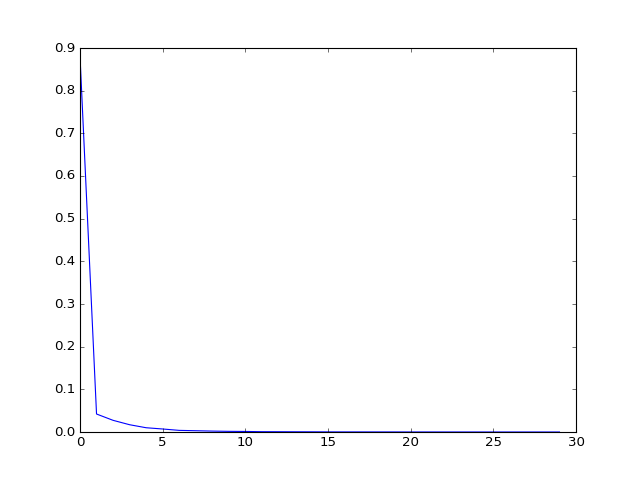

In [23]:
plt.plot(var)

In [24]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [25]:
print(var1)

[ 88.1   92.32  95.06  96.77  97.77  98.48  98.86  99.16  99.37  99.52
  99.65  99.72  99.78  99.83  99.87  99.9   99.92  99.94  99.95  99.96
  99.97  99.98  99.99 100.   100.   100.   100.   100.   100.   100.  ]


<IPython.core.display.Javascript object>


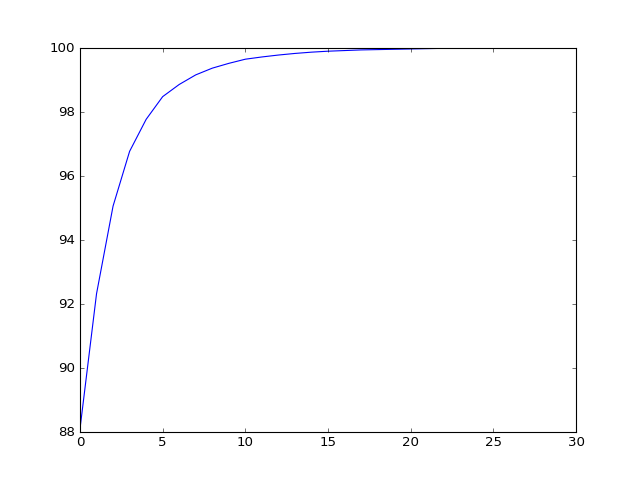

In [26]:
plt.plot(var1)

In [27]:
print("Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance")

Based on the above for /Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_g20.csv I will use the first 5 components...this could and showld be done programmatically...say the number of components that explains 90% of the variance


In [28]:
print("Scaling seems to be very important")

Scaling seems to be very important


### Transform my data based on the PCA results 

In [29]:
pca = decomposition.PCA(n_components = 10)

In [30]:
pca.fit(my_scaled_data)

PCA(copy=True, n_components=10, whiten=False)

In [31]:
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

In [32]:
type(my_scaled_data_transformed)

numpy.ndarray

In [33]:
my_scaled_data_transformed.shape

(4678, 10)

In [34]:
my_scaled_data_transformed[[0,1,-2,-1]]

array([[ -5.17164772e+01,  -4.77786981e+02,   3.61801993e+02,
          3.01239741e+02,   3.51662600e+02,   9.40285620e+01,
         -1.57482210e+02,   7.30951073e+01,  -2.02529601e+01,
          1.71598742e+01],
       [  1.10191399e+01,  -6.44567996e-01,  -5.47439783e+00,
          1.22279602e+00,   1.55678055e+00,   1.30180113e+00,
         -1.75443960e-01,   4.85700929e-01,  -9.31361571e-02,
          5.72440216e-01],
       [  1.05570697e+01,  -1.36052188e-01,  -4.87244207e+00,
         -1.71809111e-02,   1.26282992e+00,   1.86131905e+00,
         -1.88274250e-01,   3.90418687e-01,   2.50930839e-01,
          1.16616112e-02],
       [  1.11685802e+01,  -2.65618312e-01,  -5.47076611e+00,
          4.58524506e-01,   1.39399442e+00,   1.75707626e+00,
         -8.90467384e-01,   9.54566630e-01,   1.17734952e+00,
         -6.57378469e-01]])

In [35]:
my_data[my_data_data_headers].shape

(4678, 30)

#### Convert transformed data into a pandas dataframe and then combine it with the meta data 

In [36]:
# Check that the row order isn't affected
pd.DataFrame(my_scaled_data_transformed[[0,1,-2,-1]])

,0,1,2,3,4,5,6,7,8,9
0,-51.716477,-477.786981,361.801993,301.239741,351.662600,94.028562,-157.482210,73.095107,-20.252960,17.159874
1,11.019140,-0.644568,-5.474398,1.222796,1.556781,1.301801,-0.175444,0.485701,-0.093136,0.572440
2,10.557070,-0.136052,-4.872442,-0.017181,1.262830,1.861319,-0.188274,0.390419,0.250931,0.011662
3,11.168580,-0.265618,-5.470766,0.458525,1.393994,1.757076,-0.890467,0.954567,1.177350,-0.657378


In [37]:
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [38]:
my_scaled_data_transformed_pd.shape

(4678, 10)

In [39]:
my_scaled_data_transformed_pd_meta = pd.concat([my_scaled_data_transformed_pd, my_data[meta_headers]], axis=1);
# Note that the above line works because they have the same index, if they didn't and I 
## wanted to perform a cbind, I could say my_scaled_data_transformed_pd.reset_index(drop=True)

In [40]:
my_scaled_data_transformed_pd_meta.shape

(4678, 17)

In [41]:
print(my_data[meta_headers].head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd.head(n=2))
print("NEXT------------------------")
print(my_scaled_data_transformed_pd_meta.head(n=2))

    Width  cell_label    cell_plate lineage      screen      well      Time
0  5325.0  unlabelled  cell_plate_1  parent  screen_525  well_g20  257512.0
1    35.0  unlabelled  cell_plate_1  parent  screen_525  well_g20  257512.0
NEXT------------------------
           0           1           2           3           4          5  \
0 -51.716477 -477.786981  361.801993  301.239741  351.662600  94.028562   
1  11.019140   -0.644568   -5.474398    1.222796    1.556781   1.301801   

            6          7          8          9  
0 -157.482210  73.095107 -20.252960  17.159874  
1   -0.175444   0.485701  -0.093136   0.572440  
NEXT------------------------
           0           1           2           3           4          5  \
0 -51.716477 -477.786981  361.801993  301.239741  351.662600  94.028562   
1  11.019140   -0.644568   -5.474398    1.222796    1.556781   1.301801   

            6          7          8          9   Width  cell_label  \
0 -157.482210  73.095107 -20.252960  17.15987

In [42]:
filename_out = filename.split(".csv")[0] + "__robust-scaled_PCAd.csv"

In [43]:
my_scaled_data_transformed_pd_meta.to_csv(filename_out)